In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_data_cpe.tsv to train_data_cpe (1).tsv
User uploaded file "train_data_cpe.tsv" with length 12977035 bytes


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('train_data_cpe.tsv', sep = '\t')

In [0]:
df.head(5)

,primary_id,CVE_Id,description,vendor_name,product_name,# of versions,cwe,cpe_a,cpe_o,cpe_h,target_column
0,1,CVE-2018-0001,"A remote, unauthenticated attacker may be able...",juniper,junos,9,CWE-416,0,1,0,9.8
1,2,CVE-2018-0002,On SRX Series and MX Series devices with a Ser...,juniper,junos,9,CWE-399,0,1,1,5.9
2,3,CVE-2018-0003,A specially crafted MPLS packet received or pr...,juniper,junos,15,CWE-399,0,1,0,6.5
3,4,CVE-2018-0004,A sustained sequence of different types of nor...,juniper,junos,9,CWE-400,0,1,0,6.5
4,5,CVE-2018-0005,QFX and EX Series switches configured to drop ...,juniper,junos,3,CWE-754,0,1,1,8.8


In [0]:
df.drop(['confi_impact', 'integrity_impact', 'availability_impact', 'base_severity'], axis = 1, inplace = True)

In [0]:
df.shape

(29889, 11)

In [0]:
df['cwe'] = df.cwe.str.replace('CWE-', '')
df['cwe'] = df.cwe.str.replace('NVD-noinfo', '0')

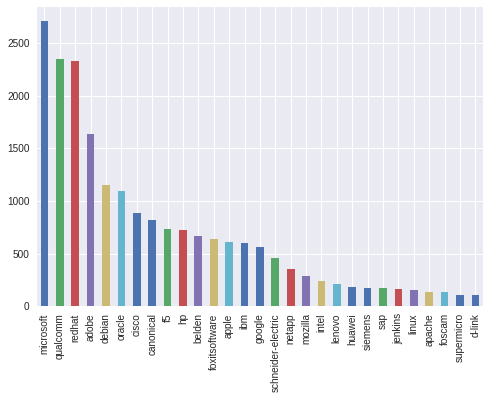

In [0]:
df['vendor_name'].value_counts()[df['vendor_name'].value_counts() > 100].plot(kind = 'bar')

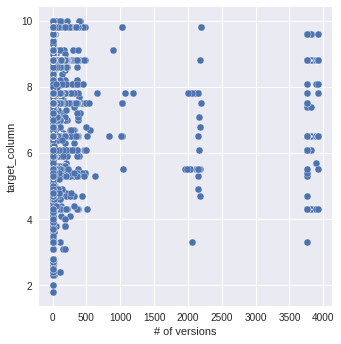

In [0]:
import seaborn as sns

sns.pairplot(x_vars=["# of versions"], y_vars=["target_column"], data=df, size=5)

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['CVE_Id'] = le.fit_transform(df['CVE_Id'])
df['vendor_name'] = le.fit_transform(df['vendor_name'])
df['product_name'] = le.fit_transform(df['product_name'])

In [0]:
df['cwe'] = df['cwe'].astype(str).astype('int64')

In [0]:
X = df[['CVE_Id', 'vendor_name', 'product_name', '# of versions', 'cwe']]
y = df['target_column']

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

kf = KFold(n_splits = 5)
all_mae = []


for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  scaler = MinMaxScaler().fit(X_train)
  XX_train = scaler.transform(X_train)
  XX_test = scaler.transform(X_test)
  
  lin_reg = LinearRegression()
  lin_reg.fit(XX_train, y_train.values)
  pred = lin_reg.predict(XX_test)
  
  #print(y_test.values)
  #print(pred)
  
  mae = mean_absolute_error(y_test, pred)
  all_mae.append(mae)
  print(mae)
  print(lin_reg.coef_)
  print()

TRAIN: [ 5978  5979  5980 ... 29886 29887 29888] TEST: [   0    1    2 ... 5975 5976 5977]
1.1978862741054364
[ 0.1063507  -0.09275554 -0.1023012  -0.1848982   1.12610697]

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [ 5978  5979  5980 ... 11953 11954 11955]
1.139427745534658
[ 0.14598164 -0.11015454 -0.19868359 -0.29053746  0.84816339]

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [11956 11957 11958 ... 17931 17932 17933]
1.4778712072045428
[ 0.20899224  0.09932314 -0.22279551 -0.37949308  0.95774072]

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [17934 17935 17936 ... 23909 23910 23911]
1.2944846080481311
[-0.09086123  0.01968211 -0.1652704  -0.09450447  0.97599931]

TRAIN: [    0     1     2 ... 23909 23910 23911] TEST: [23912 23913 23914 ... 29886 29887 29888]
1.2809933697143485
[ 0.24370643 -0.03195477 -0.0066655  -0.36651367  1.11958942]



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return sel

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

kf = KFold(n_splits = 5)
all_mae = []


for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  scaler = MinMaxScaler().fit(X_train)
  XX_train = scaler.transform(X_train)
  XX_test = scaler.transform(X_test)
  
  decision_reg = DecisionTreeRegressor()
  decision_reg.fit(XX_train, y_train.values)
  pred = decision_reg.predict(XX_test)
  
  #print(y_test.values)
  #print(pred)
  
  mae = mean_absolute_error(y_test, pred)
  all_mae.append(mae)
  print(mae)
  print()

TRAIN: [ 5978  5979  5980 ... 29886 29887 29888] TEST: [   0    1    2 ... 5975 5976 5977]
1.3011876881900304

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [ 5978  5979  5980 ... 11953 11954 11955]
1.217330210772834


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [11956 11957 11958 ... 17931 17932 17933]
1.645115423218468

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [17934 17935 17936 ... 23909 23910 23911]
1.3049514887922384

TRAIN: [    0     1     2 ... 23909 23910 23911] TEST: [23912 23913 23914 ... 29886 29887 29888]
1.3541241425464283



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

kf = KFold(n_splits = 5)
all_mae = []


for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  scaler = MinMaxScaler().fit(X_train)
  XX_train = scaler.transform(X_train)
  XX_test = scaler.transform(X_test)
  
  rf_reg = RandomForestRegressor(n_estimators = 100)
  rf_reg.fit(XX_train, y_train.values)
  pred = rf_reg.predict(XX_test)
  
  #print(y_test.values)
  #print(pred)
  
  mae = mean_absolute_error(y_test, pred)
  all_mae.append(mae)
  print(mae)
  print()

TRAIN: [ 5978  5979  5980 ... 29886 29887 29888] TEST: [   0    1    2 ... 5975 5976 5977]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.9737467380394776

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [ 5978  5979  5980 ... 11953 11954 11955]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1.005852960856473

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [11956 11957 11958 ... 17931 17932 17933]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1.2577321846771499

TRAIN: [    0     1     2 ... 29886 29887 29888] TEST: [17934 17935 17936 ... 23909 23910 23911]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.9837930746068922

TRAIN: [    0     1     2 ... 23909 23910 23911] TEST: [23912 23913 23914 ... 29886 29887 29888]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1.0320078634766592



In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

desc = df['description']

kf = KFold(n_splits = 5)
all_mae = []

for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  desc_train, desc_test = desc.iloc[train_index], desc.iloc[test_index]
  
  vectorizer = TfidfVectorizer(sublinear_tf= True, analyzer = 'word', ngram_range=(3, 6), stop_words = 'english')
  #vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(1, 3))
  vect_train = vectorizer.fit(desc_train)
  
  desc_train_transformed = vect_train.transform(desc_train)
  desc_test_transformed = vect_train.transform(desc_test)
  
  lin_reg = LinearRegression()
  lin_reg.fit(desc_train_transformed, y_train.values)
  pred = lin_reg.predict(desc_test_transformed)
 
  #print(y_test.values)
  #print(pred)
  #print(vect_train.get_feature_names())
  
  mae = mean_absolute_error(y_test, pred)
  all_mae.append(mae)
  print(mae)
  print()

1.0030141989503556

0.9940286683658957



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, shuffle = False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
XX_train = scaler.transform(X_train)
XX_test = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(XX_train, y_train.values)
pred = lin_reg.predict(XX_test)

mae = mean_absolute_error(y_test, pred)

print(mae)

1.3036606639307493


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
XX_train = scaler.transform(X_train)
XX_test = scaler.transform(X_test)

rf_reg = RandomForestRegressor(n_estimators = 500)
rf_reg.fit(XX_train, y_train.values)
pred = rf_reg.predict(XX_test)

mae = mean_absolute_error(y_test, pred)

print(mae)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1.1425432329525784


In [0]:
from sklearn.tree import DecisionTreeRegressor

decision_reg = DecisionTreeRegressor()
decision_reg.fit(X_train, y_train.values)
pred = decision_reg.predict(X_test)

mae = mean_absolute_error(y_test, pred)

print(mae)

1.4966424368293527


In [0]:
print(y_test.values)
print(pred)

[7.8 7.8 5.5 ... 8.8 6.5 6.5]
[7.8 7.8 7.8 ... 9.8 6.5 6.5]


In [0]:
len(pred)

2889

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  import sys


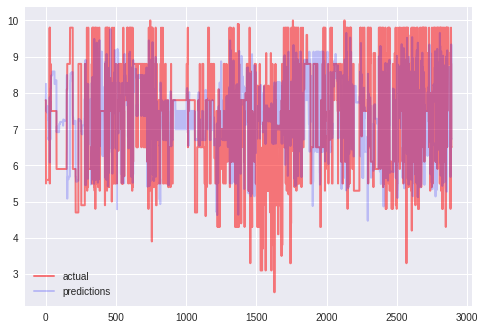

In [0]:
import matplotlib.pyplot as plt
import numpy as np

df_temp = pd.DataFrame({'x': range(1,2890), 'y1': y_test.values, 'y2': pred})

plt.plot( 'x', 'y1', data=df_temp, marker='', color='red', linewidth=2, alpha = 0.5, label = 'actual')
plt.plot( 'x', 'y2', data=df_temp, marker='', color='blue', linewidth=2, alpha = 0.2, label = 'predictions')

plt.legend()